# Import Library

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from google.colab import drive
import nltk
!pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
!pip install tqdm
plt.style.use('ggplot')

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


# Read the Data and Merge all Datas

In [ ]:
data1 = pd.read_excel("/content/drive/MyDrive/Data Science/TA/Data/data1(2015 - jan_2020).xlsx", sheet_name="data1(2015 - jan_2020)")
data2 = pd.read_excel("/content/drive/MyDrive/Data Science/TA/Data/data2.xlsx", sheet_name="data2")
data3 = pd.read_excel("/content/drive/MyDrive/Data Science/TA/Data/data3.xlsx", sheet_name="data3")
data4 = pd.read_excel("/content/drive/MyDrive/Data Science/TA/Data/data4(Turnbackhoax.id).xlsx", sheet_name="data4(Turnbackhoax.id)")

In [ ]:
def merge_data(data1, data2, data3, data4):
  data1 = data1[['berita', 'kategori']]
  data2 = data2.rename(columns={'tagging':'kategori'})
  # lower the text label
  data2['kategori'] = data2['kategori'].str.lower()
  data3 = data3.rename(columns={'tagging':'kategori'})
  data3['kategori'] = data3['kategori'].str.lower()

  data11 = pd.concat([data2, data3], axis=0)
  data22 = pd.concat([data1, data4], axis=0)

  data4['berita'] = data4['Headline'] + ' ' + data4['Body']
  data4 = data4.rename(columns={'Label':'kategori'})
  data4.drop(columns=['Headline', 'Body'], inplace=True)
  data4 = data4[['berita', 'kategori']]
  data4.loc[data4['kategori'] == 1, 'kategori'] = 'valid'
  data4.loc[data4['kategori'] == 0, 'kategori'] = 'hoax'
  data4['kategori'] = data4['kategori'].str.replace("0", "hoax")

  data = pd.concat([data1, data2, data3, data4], axis = 0)
  data.dropna(subset=['berita'], inplace=True)

  data = data.sample(len(data)).reset_index(drop=True)

  return data

data = merge_data(data1, data2, data3, data4)

In [ ]:
data.head()

,berita,kategori
0,Permen berbentuk dot susu atau permen keras ya...,valid
1,"""Gunung Agung erupsi untuk pertama kali pada 2...",valid
2,"""Komandan ISIS Afrika Tewas karena Serangan Ud...",valid
3,Stroke menjadi salah satu penyakit yang mengha...,valid
4,Peserta Aksi 212 Jilid 2 yang berasal dari lua...,hoax


In [ ]:
data_berita = data[['berita']]
data_kategori = data[['kategori']]
# data_berita.to_csv("fake_news_sentences.txt", index=False, encoding='utf-8')

In [ ]:
data_berita.shape

(2466, 1)

In [ ]:
data_kategori.to_csv("fake_news_sentences.txt", index=False, encoding='utf-8')
# np.savetxt(r'C:\Users\LENOVO\anaconda3\Data Science\TA\GNN\Text-GCN\data\corpus\fake_news_sentences.txt', data_berita.values)

In [ ]:
data_berita

NameError: ignored

In [ ]:
data1 = data1[['berita', 'kategori']]

In [ ]:
data1.head()

,berita,kategori
0,"""Gunung Agung erupsi untuk pertama kali pada 2...",valid
1,"""Jakarta, CNN Indonesia -- Menteri BUMN Erick ...",valid
2,"""Dosen Fakultas Kedokteran Hewan IPB, Yusuf Ri...",valid
3,"""Jakarta - Dua anggota TNI, Serda N dan Serda ...",valid
4,"""Akui Tembak Jatuh Pesawat Ukraina, Iran Tuai ...",valid


In [ ]:
data1.kategori.value_counts()

valid    250
hoax     250
Name: kategori, dtype: int64

In [ ]:
data2 = data2.rename(columns={'tagging':'kategori'})
data2['kategori'] = data2['kategori'].str.lower()
data3 = data3.rename(columns={'tagging':'kategori'})
data3['kategori'] = data3['kategori'].str.lower()

In [ ]:
data2.head()

,berita,kategori
0,"Jakarta, Di jejaring sosial, banyak beredar in...",valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,valid
3,Ikan lele merupakan salah satu makanan favorit...,valid
4,Ikan lele merupakan bahan makanan yang cukup p...,valid


In [ ]:
data11 = pd.concat([data2, data3], axis=0)
data11.kategori.value_counts()

valid    531
hoax     319
Name: kategori, dtype: int64

In [ ]:
data22 = pd.concat([data1, data4], axis=0)
data22.kategori.value_counts()

valid    250
hoax     250
Name: kategori, dtype: int64

In [ ]:
data3.head()

,berita,kategori
0,"Jakarta, Di jejaring sosial, banyak beredar in...",valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,valid
3,Ikan lele merupakan salah satu makanan favorit...,valid
4,Ikan lele merupakan bahan makanan yang cukup p...,valid


In [ ]:
data4['berita'] = data4['Headline'] + ' ' + data4['Body']
data4 = data4.rename(columns={'Label':'kategori'})
data4.drop(columns=['Headline', 'Body'], inplace=True)
data4 = data4[['berita', 'kategori']]
data4.loc[data4['kategori'] == 1, 'kategori'] = 'valid'
data4.loc[data4['kategori'] == 0, 'kategori'] = 'hoax'
data4['kategori'] = data4['kategori'].str.replace("0", "hoax")

In [ ]:
data4.head()

,berita,kategori
0,Pertamina dan Pemerintah Kalrifikasi Isu BBM N...,valid
1,Polda Nusa Tenggara Barat Mengklarifkasi Bahwa...,valid
2,PT Ultrajaya Milk Industry Tbk Mengklarifikasi...,valid
3,BBKSDA Jatim Mengklarifikasi Bahwa Wisata Alam...,valid
4,BMKG Mataram Menghimbau Agar Warga Tidak Langs...,valid


In [ ]:
data = pd.concat([data1, data2, data3, data4], axis = 0)
data.dropna(subset=['berita'], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   berita    2466 non-null   object
 1   kategori  2466 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [ ]:
data['kategori'].value_counts()

hoax     1252
valid    1214
Name: kategori, dtype: int64

In [ ]:
data = data.sample(len(data)).reset_index(drop=True)

In [ ]:
data.sample(5)

,berita,kategori
1683,Tes Sederhana Deteksi Asam Urat Ilustrasi Asam...,hoax
1512,"Bitungnews – Budaya Reog Ponorogo, merupakan s...",hoax
1650,Kepala Bagian Penerangan Umum (Kabagpenum) Pol...,valid
1562,Kabar Facebook bakal diblokir di Indonesia pad...,valid
1072,Traveloka menanggapi ramai pemberitaan mengena...,valid


In [ ]:
data2.head()

,berita,tagging
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


In [ ]:
data2 = data2.rename(columns={'tagging':'kategori'})
data2.loc[data2['kategori'] == 'valid', 'kategori'] = 'valid'
data2.loc[data2['kategori'] == 0, 'kategori'] = 'hoax'

In [ ]:
data2.head()

,berita,kategori
0,"Jakarta, Di jejaring sosial, banyak beredar in...",Valid
1,Isu bahwa ikan lele mengandung sel kanker di j...,Valid
2,Bagi penikmat kuliner dengan bahan dasar ikan ...,Valid
3,Ikan lele merupakan salah satu makanan favorit...,Valid
4,Ikan lele merupakan bahan makanan yang cukup p...,Valid


# Cleaning Data
* Lowercase all words
* Remove Hyperlink / URL
* Remove digits and replace symbols
* Remove abbreviated words
* Remove stopwords


In [ ]:
# Lowercase all words
data['berita'] = data['berita'].str.lower()

In [ ]:
data2['berita'] = data2['berita'].str.lower()

In [ ]:
# Eliminate handles, symbols, typo words, repeated characters, etx
def cleaning(df, cols, remove=True):
  # Remove Hyperlink / URL, mentions
  df[cols] = df[cols].str.replace('(https://[^ ]+)', '', regex=True)
  df[cols] = df[cols].str.replace('(http://[^ ]+)', '', regex=True)
  df[cols] = df[cols].str.replace('(@[A-Za-z0-9]+)', '', regex=True)
  df[cols] = df[cols].str.replace('([A-Za-z0-9]+.com)', '', regex=True)

  # Remove Digits and replcae & / with dan atau
  df[cols] = df[cols].str.replace('[a-zA-Z]+[0-9]+', '', regex=True)
  df[cols] = df[cols].str.replace('\S(/)\S', ' atau ', regex=True)
  df[cols] = df[cols].str.replace('\s(/)\s', ' atau ', regex=True)
  df[cols] = df[cols].str.replace('\S(&)\S', ' atau ', regex=True)
  df[cols] = df[cols].str.replace('\s(&)\s', ' atau ', regex=True)

  # Remove Punctuations
  df[cols] = df[cols].str.replace('[!?]', ' ', regex=True)
  df[cols] = df[cols].str.replace('[/,."-:=“”><—|]+ ', ' ', regex=True)
  df[cols] = df[cols].str.replace(' [/,."-:=“”><—|]+', ' ', regex=True)
  df[cols] = df[cols].str.replace('[/,."-:=“”><—|]+', ' ', regex=True)
  df[cols] = df[cols].str.replace('[…]+', '', regex=True)
  df[cols] = df[cols].str.replace('[–]+', '', regex=True)
  df[cols] = df[cols].str.replace('[‘’]', '', regex=True)

  # Menghapus kata - kata yang disingkat
  df[cols] = df[cols].str.replace('dg', 'dengan', regex=True)
  df[cols] = df[cols].str.replace(' d ', ' di ', regex=True)
  df[cols] = df[cols].str.replace(' k ', ' ke ', regex=True)
  df[cols] = df[cols].str.replace(' yg ', ' yang ', regex=True)
  df[cols] = df[cols].str.replace(' gk ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace('gk ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace('nggak ', 'tidak ', regex=True)
  df[cols] = df[cols].str.replace(' nggak ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace(' ga ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace(' gak ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace(' g ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace(' ngak ', ' tidak ', regex=True)
  df[cols] = df[cols].str.replace(' lg ', ' lagi ', regex=True)
  df[cols] = df[cols].str.replace('koq', 'kok', regex=True)
  df[cols] = df[cols].str.replace(' jd ', ' jadi ', regex=True)
  df[cols] = df[cols].str.replace(' lbh ', ' lebih ', regex=True)
  df[cols] = df[cols].str.replace('lbh', 'lebih', regex=True)
  df[cols] = df[cols].str.replace('applikasi', ' aplikasi ', regex=True)
  df[cols] = df[cols].str.replace('apk', 'aplikasi', regex=True)
  df[cols] = df[cols].str.replace('knp', 'kenapa', regex=True)
  df[cols] = df[cols].str.replace('knp', 'kenapa', regex=True)
  df[cols] = df[cols].str.replace('bagua', 'bagus', regex=True)
  df[cols] = df[cols].str.replace(' sy ', ' saya ', regex=True)
  df[cols] = df[cols].str.replace('mslh', 'masalah', regex=True)
  df[cols] = df[cols].str.replace(' kab ', ' kabupaten ', regex=True)
  df[cols] = df[cols].str.replace('aja', 'saja', regex=True)
  df[cols] = df[cols].str.replace('tdk', 'tidak', regex=True)
  df[cols] = df[cols].str.replace('tdk', 'tidak', regex=True)
  df[cols] = df[cols].str.replace('taii', '', regex=True)
  df[cols] = df[cols].str.replace('njingg', '', regex=True)
  df[cols] = df[cols].str.replace('trobel', 'trouble', regex=True)
  df[cols] = df[cols].str.replace('tololl', '', regex=True)
  df[cols] = df[cols].str.replace('lemot', 'lambat', regex=True)
  df[cols] = df[cols].str.replace('lemoott', 'lambat', regex=True)
  df[cols] = df[cols].str.replace('dijital', 'digital', regex=True)
  df[cols] = df[cols].str.replace('babi', '', regex=True)
  df[cols] = df[cols].str.replace('sdh', 'sudah', regex=True)

  letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
        'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
  # for c in letters:
  #     if c in ['g', 'n']:
  #       df[cols] = df[cols].str.replace(c+'{3,}', c, regex=True)
  #     else:
  #       df[cols] = df[cols].str.replace(c+'{2,}', c, regex=True)

  # Remove stopwords
  if remove:
    stop_words = list(stopwords.words('indonesian'))
    not_removed = ['tidak', 'tidaklah', 'aku', 'awal', 'baik', 'banyak', 'bekerja', 'besar', 'bukan', 'empat', 'hanya', 'hanyalah', 'harus', 'haruslah',
               'ibu', 'ingin', 'inginkan', 'jangan', 'janganlah', 'jangankan', 'jelas', 'jelaskan', 'jelaslah', 'justru', 'kalau', 'kecil']
    for w in not_removed:
        stop_words.remove(w)

    df[cols] = df[cols].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


  return df

In [ ]:
cleaned_data = cleaning(data, 'berita')

In [ ]:
cleaned_data2 = cleaning(data2, 'berita')
cleaned_data2['labels'] = cleaned_data2['kategori'].replace({'Valid':1, 'Hoax':0})

In [ ]:
cleaned_data2.sample(5)

,berita,kategori,labels
149,masyarakat muslim dihebohkan kabar sikat gigi ...,Valid,1
183,banyak artikel artikel bertebaran enaknya mene...,Valid,1
75,komuniras reog ponorogo krp berencana menggela...,Valid,1
221,napi teroris rumah tahanan kelapa depok jawa b...,Valid,1
14,sesuap daging ikan lele memicu sel kanker tubu...,Hoax,0


In [ ]:
cleaned_data.sample(7)

,berita,kategori
1012,institut pencegahan kanker mengumumkan ranking...,hoax
1548,penculik anak berpakaian mukena putih bekasi s...,hoax
526,jakarta beredar foto peserta aksi jilid media ...,valid
310,sebarkan mengheck mengganti data kpud mendzoli...,hoax
148,jagat dunia maya diramaikan sajakan boikot tra...,hoax
1198,wasekjen mui kh tengku zulkarnain pembakaran m...,hoax
813,motor terbakar hp didalam jok sumber media sos...,hoax


In [ ]:
cleaned_data['berita'] = cleaned_data['berita'].str.strip()
cleaned_data['berita'] = cleaned_data['berita'].str.rstrip()

In [ ]:
data_berita = cleaned_data[['berita']]
data_kategori = cleaned_data[['kategori']]
data_berita.to_csv("fake_news_sentences.txt", index=False, encoding="utf-8")

In [ ]:
data_kategori.to_csv("fake_news_labels.txt", index=False, encoding="utf-8")

In [ ]:
cleaned_data.sample(6)

,berita,kategori
596,jackie chan masuk islam sumber media sosial fa...,hoax
1219,komunitas paguyuban kesenian reog ponorogo jab...,hoax
1935,modus pecah ban botol plastik diisi air keras ...,hoax
954,klarifikasi djarot informasi menyuap kepala de...,valid
423,klarifikasi dinas kesehatan kabupaten cianjur ...,valid
1460,penjelasan lengkap duduk perkara terkait video...,valid


In [ ]:
cleaned_data.berita

0       permen berbentuk dot susu permen keras dicurig...
1       gunung agung erupsi kali november letusan wita...
2               komandan isis afrika tewas serangan udara
3       stroke salah penyakit menghantui pasca lebaran...
4       peserta aksi jilid berasal kota masjid istiqla...
                              ...                        
2461    kemenristek dikti bantah surat terkait pengemb...
2462    juli abk pukat tunda l s milik china tong lim ...
2463    petugas satuan resnarkoba polres buleleng dina...
2464    selebaran poster acara penobatan miss waria ba...
2465    seruan uninstall aplikasi traveloka banyak dip...
Name: berita, Length: 2466, dtype: object

In [ ]:
cleaned_data['len_words'] = cleaned_data['berita'].apply(lambda x: len(x.split()))

In [ ]:
cleaned_data2['len_words'] = cleaned_data2['berita'].apply(lambda x: len(x.split()))

NameError: ignored

# Simple EDA

<ipython-input-24-d026b38b7a41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_data['len_words'])


<Axes: xlabel='len_words', ylabel='Density'>

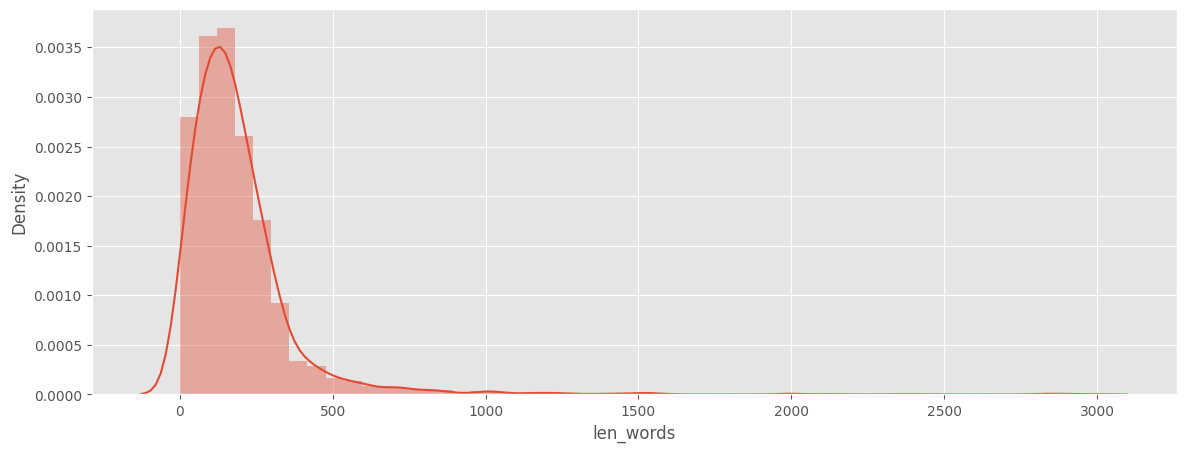

In [ ]:
# Dsitribution of length of words in each rows
plt.figure(figsize=(14,5))
sns.distplot(cleaned_data['len_words'])

In [ ]:
import collections
from collections import defaultdict

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# # text = indihome['review']

# def generate_ngrams(text, n_gram=1):
#     token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
#     ngrams = zip(*[token[i:] for i in range(n_gram)])
#     return [' '.join(ngram) for ngram in ngrams]

# def generate_ngrams_bar(n_gram=1):
#     # Unigrams
#     if n_gram == 1:
#         n = 'uni'
#         review_unigrams = defaultdict(int)

#         for text in cleaned_data['berita']:
#             for word in generate_ngrams(text):
#                 review_unigrams[word] += 1

#         dfNew_review_ngrams = pd.DataFrame(sorted(review_unigrams.items(), key=lambda x: x[1])[::-1])
#     # Bigrams
#     elif n_gram == 2:
#         n = 'bi'
#         review_bigrams = defaultdict(int)

#         for text in cleaned_data['berita']:
#             for word in generate_ngrams(text, n_gram=2):
#                 review_bigrams[word] += 1

#         dfNew_review_ngrams = pd.DataFrame(sorted(review_bigrams.items(), key=lambda x: x[1])[::-1])
#     # Trigrams
#     elif n_gram == 3:
#         n = 'tri'
#         review_trigrams = defaultdict(int)

#         for text in cleaned_data['berita']:
#             for word in generate_ngrams(text, n_gram=3):
#                 review_trigrams[word] += 1

#         dfNew_review_ngrams = pd.DataFrame(sorted(review_trigrams.items(), key=lambda x: x[1])[::-1])

#     N = 100
#     fig, axes = plt.subplots(figsize=(10, 20), dpi=100)
#     plt.tight_layout()

#     sns.barplot(y=dfNew_review_ngrams[0].values[:N], x=dfNew_review_ngrams[1].values[:N], color='red')
#     plt.bar_label(axes.containers[0])

#     axes.spines['right'].set_visible(False)
#     axes.set_xlabel('')
#     axes.set_ylabel('')
#     axes.tick_params(axis='x')
#     axes.tick_params(axis='y')

# #     axes.set_title('Top {} most common {}grams in {} Job Description'.format(N, n, position), fontsize=15)

#     plt.show()

In [ ]:
# generate_ngrams_bar(1)

In [ ]:
cek = cleaned_data['berita'].values.tolist()

In [ ]:
cek2 = cleaned_data['berita'].values.tolist()

In [ ]:
print("Min :", cleaned_data['len_words'].min())
print("Max :", cleaned_data['len_words'].max())
print("Mean :", cleaned_data['len_words'].mean())
print("Median :", cleaned_data['len_words'].median())

Min : 2
Max : 2969
Mean : 192.09894566098944
Median : 154.0


In [ ]:
cleaned_data['labels'] = cleaned_data['kategori'].replace({'valid':1, 'hoax':0})

In [ ]:
cleaned_data.sample(5)

,berita,kategori,len_words,labels
1554,gempa magnitudo menggoyang kota bogor jawa bar...,valid,55,1
2324,bra berisi cairan penyebab kanker payudara sum...,hoax,289,0
947,informasi umat muslim teliti berhati hati memi...,hoax,58,0
861,orang meninggal dunia luka luka tertabrak kere...,valid,71,1
540,dream masyarakat muslim dihebohkan kabar sikat...,hoax,189,0


# Modeling

In [ ]:
X = cleaned_data['berita'].values.tolist()
y = cleaned_data['labels'].values.tolist()

In [ ]:
X2 = cleaned_data2['berita'].values.tolist()
y2= cleaned_data2['labels'].values.tolist()

In [ ]:
len(X), len(y)

(2466, 2466)

In [ ]:
len(X2), len(y2)

(250, 250)

## Tokenize Words

In [ ]:
# Create tokenizer, only take into accounts the 2500 most common words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

# Turn list into list of integer indices
sequences = tokenizer.texts_to_sequences(X)

# Show the vocabularies
word_index = tokenizer.word_index
print(word_index)
print("Num of unique tokens :", len(word_index))

max_lengths =max([len(curr_seq) for curr_seq in sequences])
print(max_lengths)

{'tidak': 1, 'indonesia': 2, 'media': 3, 'orang': 4, 'sumber': 5, 'informasi': 6, 'ikan': 7, 'sosial': 8, 'lele': 9, 'foto': 10, 'the': 11, 'hoax': 12, 'beredar': 13, 'salah': 14, 'klarifikasi': 15, 'banyak': 16, 'berita': 17, 'masyarakat': 18, 'jakarta': 19, 'akun': 20, 'presiden': 21, 'hanya': 22, 'facebook': 23, 'anak': 24, 'penjelasan': 25, 'kabar': 26, 'terkait': 27, 'bukan': 28, 'pokemon': 29, 'negara': 30, 'referensi': 31, 'narasi': 32, 'masjid': 33, 'aksi': 34, 'bulu': 35, 'video': 36, 'isu': 37, 'pesan': 38, 'sikat': 39, 'harus': 40, 'pemerintah': 41, 'ssaja': 42, 'stroke': 43, 'permen': 44, 'kalau': 45, 'kepala': 46, 'nama': 47, 'mengandung': 48, 'warga': 49, 'baik': 50, 'iphone': 51, 'rumah': 52, 'of': 53, 'surat': 54, 'memiliki': 55, 'besar': 56, 'masuk': 57, 'gigi': 58, 'kota': 59, 'air': 60, 'jokowi': 61, 'hasil': 62, 'and': 63, 'langsung': 64, 'data': 65, 'dunia': 66, 'a': 67, 'anggota': 68, 'to': 69, 'bahan': 70, 'tahanan': 71, 'reog': 72, 'kanker': 73, 'makanan': 74, '

In [ ]:
min_lengths =min([len(curr_seq) for curr_seq in sequences])
print(min_lengths)

2


In [ ]:
# Create tokenizer, only take into accounts the 2500 most common words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X2)

# Turn list into list of integer indices
sequences = tokenizer.texts_to_sequences(X2)

# Show the vocabularies
word_index = tokenizer.word_index
print(word_index)
print("Num of unique tokens :", len(word_index))

max_lengths =max([len(curr_seq) for curr_seq in sequences])
print(max_lengths)

{'tidak': 1, 'lele': 2, 'ikan': 3, 'pokemon': 4, 'bulu': 5, 'stroke': 6, 'sikat': 7, 'iphone': 8, 'permen': 9, 'aksi': 10, 'banyak': 11, 'orang': 12, 'masjid': 13, 'salah': 14, 'tahanan': 15, 'gigi': 16, 'reog': 17, 'mengandung': 18, 'kuas': 19, 'indonesia': 20, 'traveloka': 21, 'kjri': 22, 'istiqlal': 23, 'davao': 24, 'media': 25, 'beredar': 26, 'plus': 27, 'informasi': 28, 'sel': 29, 'bristle': 30, 'harus': 31, 'anak': 32, 'apple': 33, 'jakarta': 34, 'darah': 35, 'ananda': 36, 'bahan': 37, 'pembakaran': 38, 'bahasa': 39, 'ponorogo': 40, 'hanya': 41, 'kabar': 42, 'go': 43, 'anies': 44, 'sosial': 45, 'kanker': 46, 'penderita': 47, 'yahudi': 48, 'memiliki': 49, 'baik': 50, 'masyarakat': 51, 'makanan': 52, 'melengkung': 53, 'berita': 54, 'petugas': 55, 'jarum': 56, 'sssaja': 57, 'rumah': 58, 'masuk': 59, 'brimob': 60, 'kanisius': 61, 'isu': 62, 'rutan': 63, 'terkait': 64, 'game': 65, 'tubuh': 66, 'dot': 67, 'narkoba': 68, 'kerusuhan': 69, 'kalau': 70, 'produk': 71, 'nama': 72, 'derianto'

In [ ]:
min_lengths =min([len(curr_seq) for curr_seq in sequences])
print(min_lengths)

55


## Padding Sequence

In [ ]:
# Padding the sequences for shorter reviews
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

data = pad_sequences(sequences, maxlen=max_lengths)
y = np.asarray(y)
print(data)
print("Shape of data :", data.shape)
print("Shape of label :", y.shape)

[[   0    0    0 ...  896   44  293]
 [   0    0    0 ...  414  198  444]
 [   0    0    0 ...  626  265  692]
 ...
 [   0    0    0 ... 6081 1857 8666]
 [   0    0    0 ... 3061 2211   31]
 [   0    0    0 ... 1966  718  140]]
Shape of data : (2466, 2969)
Shape of label : (2466,)


In [ ]:
# Padding the sequences for shorter reviews
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

data2 = pad_sequences(sequences, maxlen=max_lengths)
y2 = np.asarray(y2)
print(data2)
print("Shape of data :", data2.shape)
print("Shape of label :", y2.shape)

[[   0    0    0 ...  702 1089   96]
 [   0    0    0 ...  839  337 1223]
 [   0    0    0 ...   46   66  109]
 ...
 [   0    0    0 ...  713  878 1062]
 [   0    0    0 ...    1  659  478]
 [   0    0    0 ...    1  659  478]]
Shape of data : (250, 742)
Shape of label : (250,)


## Take into Accounts most n words

In [ ]:
# # Create tokenizer, only take into accounts the 2500 most common words
# tokenizer = Tokenizer(num_words=1000)
# tokenizer.fit_on_texts(X)

# # Turn list into list of integer indices
# sequences = tokenizer.texts_to_sequences(X)

# # Show the vocabularies
# word_index = tokenizer.word_index
# print(word_index)
# print("Num of unique tokens :", len(word_index))

# max_lengths =max([len(curr_seq) for curr_seq in sequences])
# print(max_lengths)

{'tidak': 1, 'indonesia': 2, 'media': 3, 'orang': 4, 'sumber': 5, 'informasi': 6, 'ikan': 7, 'sosial': 8, 'lele': 9, 'foto': 10, 'the': 11, 'hoax': 12, 'beredar': 13, 'salah': 14, 'klarifikasi': 15, 'banyak': 16, 'berita': 17, 'masyarakat': 18, 'jakarta': 19, 'akun': 20, 'presiden': 21, 'hanya': 22, 'facebook': 23, 'anak': 24, 'penjelasan': 25, 'kabar': 26, 'terkait': 27, 'bukan': 28, 'pokemon': 29, 'negara': 30, 'referensi': 31, 'narasi': 32, 'masjid': 33, 'aksi': 34, 'bulu': 35, 'video': 36, 'isu': 37, 'pesan': 38, 'sikat': 39, 'harus': 40, 'pemerintah': 41, 'ssaja': 42, 'stroke': 43, 'permen': 44, 'kalau': 45, 'kepala': 46, 'nama': 47, 'mengandung': 48, 'warga': 49, 'baik': 50, 'iphone': 51, 'rumah': 52, 'of': 53, 'surat': 54, 'memiliki': 55, 'besar': 56, 'masuk': 57, 'gigi': 58, 'kota': 59, 'air': 60, 'jokowi': 61, 'hasil': 62, 'and': 63, 'langsung': 64, 'data': 65, 'dunia': 66, 'a': 67, 'anggota': 68, 'to': 69, 'bahan': 70, 'tahanan': 71, 'reog': 72, 'kanker': 73, 'makanan': 74, '

In [ ]:
# print(sequences)

[[324, 385, 86, 83, 58, 896, 89, 35, 607, 89, 35, 922, 89, 67, 478, 644, 607, 89, 478, 89, 871, 89, 66, 89, 70, 615, 83, 39, 39, 58, 89, 35, 313, 644, 934, 644, 35, 313, 644, 934, 70, 83, 39, 70, 39, 83, 70, 83, 39, 39, 58, 110, 35, 313, 752, 86, 83, 39, 505, 378, 1, 70, 327, 110, 335, 50, 231, 298, 327, 110, 335, 1, 108, 83, 58, 83, 83, 39, 110, 35, 1, 14, 6, 39, 83, 110, 35, 185, 89, 607, 75, 507, 697, 86, 58, 35, 697, 871, 86, 39, 58, 505, 35, 685, 589, 269, 39, 58, 47, 871, 86, 39, 505, 35, 86, 1, 185, 89, 35, 795, 607, 70, 70, 35, 70, 86, 896, 313, 1, 765, 70, 478, 884, 50, 42, 194, 70, 782, 550, 1, 223, 273], [847, 5, 20, 32, 847, 176, 138, 25, 12, 423, 359, 312, 12, 77, 257, 11, 156, 11, 77, 382, 525, 410, 406], [19, 18, 179, 4, 514, 43, 84, 221, 43, 179, 84, 557, 261, 655, 262, 531, 655, 243, 264, 43, 262, 395, 167, 1, 369, 179, 531, 307, 264, 43, 16, 18, 14, 179, 1, 449, 370, 43, 154, 662, 215, 154, 796, 43, 52, 129, 43, 154, 184, 43, 171, 264, 370, 56, 4, 283, 19, 190, 594, 1

In [ ]:
# max_lengths =max([len(curr_seq) for curr_seq in sequences])
# max_lengths

1372

In [ ]:
# # Padding the sequences for shorter reviews
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# data = pad_sequences(sequences, maxlen=max_lengths)
# y = np.asarray(y)
# print(data)
# print("Shape of data :", data.shape)
# print("Shape of label :", y.shape)

[[  0   0   0 ...   1 223 273]
 [  0   0   0 ... 525 410 406]
 [  0   0   0 ... 389 474 839]
 ...
 [  0   0   0 ...  12 410 406]
 [  0   0   0 ...  55  47 542]
 [  0   0   0 ... 540 232  31]]
Shape of data : (2466, 1372)
Shape of label : (2466,)


In [ ]:
# # Load word embeddings
# import gensim

# path = "/content/drive/MyDrive/Data Science/TA/idwiki_word2vec_300.model"
# id_w2v = gensim.models.word2vec.Word2Vec.load(path)
# # print(id_w2v.most_similar('raja'))

## Used Pretrained Word Embeddings

In [ ]:
# Load word embeddings (100)
import gensim

path = "/content/drive/MyDrive/Data Science/TA/idwiki_word2vec_100.model"
id_w2v = gensim.models.word2vec.Word2Vec.load(path)
# print(id_w2v.most_similar('raja'))

In [ ]:
id_w2v

In [ ]:
print(id_w2v.wv.most_similar('ganteng'))

[('kece', 0.783135175704956), ('jutek', 0.7799873352050781), ('jomblo', 0.7663962841033936), ('pacarku', 0.7648475766181946), ('cewek', 0.7641704678535461), ('tajir', 0.7641211748123169), ('tuyul', 0.7511588931083679), ('superboy', 0.7501905560493469), ('cowok', 0.7361092567443848), ('jodohku', 0.730392575263977)]


In [ ]:
len(list(id_w2v.wv['jokowi']))

100

In [ ]:
# # Converting data to matrix of shape (33606 + 1, 300)
# word_embeddings = id_w2v
# unique_words = len(word_index)
# total_words = unique_words + 1
# skipped_words = 0
# embedding_dim = 300
# embedding_matrix = np.zeros((total_words, embedding_dim))
# for word, index in tokenizer.word_index.items():
#   try:
#     embedding_vector = word_embeddings[word]
#   except:
#     skipped_words = skipped_words + 1
#     pass
#   if embedding_matrix[index] is not None:
#     embedding_matrix[index] = embedding_vector
# print("Embedding matrix shape :", embedding_matrix.shape)

In [ ]:
word_embeddings["tidak"]

TypeError: ignored

In [ ]:
# Converting data to matrix of shape (, 100)
word_embeddings = id_w2v.wv
unique_words = len(word_index)
total_words = unique_words + 1
skipped_words = 0
embedding_dim = 100
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, index in tokenizer.word_index.items():
  try:
    embedding_vector = word_embeddings[word]
  except:
    skipped_words = skipped_words + 1
    pass
  if embedding_matrix[index] is not None:
    embedding_matrix[index] = embedding_vector
print("Embedding matrix shape :", embedding_matrix.shape)

Embedding matrix shape : (33607, 100)


In [ ]:
# Converting data to matrix of shape (, 100)
word_embeddings = id_w2v
unique_words = len(word_index)
total_words = unique_words + 1
skipped_words = 0
embedding_dim = 100
embedding_matrix = np.zeros((total_words, embedding_dim))
for word, index in tokenizer.word_index.items():
  try:
    embedding_vector = word_embeddings[word]
  except:
    skipped_words = skipped_words + 1
    pass
  if embedding_matrix[index] is not None:
    embedding_matrix[index] = embedding_vector
print("Embedding matrix shape :", embedding_matrix.shape)

Embedding matrix shape : (6808, 100)


<ipython-input-73-de805cd1d6ae>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  embedding_vector = word_embeddings[word]


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Create embedding layers
embedding_layer = layers.Embedding(total_words, embedding_dim, weights=[embedding_matrix], input_length=max_lengths, trainable=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, stratify=y, random_state=45)

In [ ]:
X_train.shape, X_test.shape

((2219, 2969), (247, 2969))

In [ ]:
X_train

array([[   0,    0,    0, ...,   68, 3278, 3575],
       [   0,    0,    0, ...,   40, 1164, 1062],
       [   0,    0,    0, ...,  544,   50, 2336],
       ...,
       [   0,    0,    0, ...,  158,  403,   76],
       [   0,    0,    0, ...,  244,   17,   40],
       [   0,    0,    0, ..., 1296,  297,  368]], dtype=int32)

## Modeling

### Simple RNN

In [ ]:
# Simple RNN Model

model = keras.Sequential()
model.add(embedding_layer)
# model.add(layers.SimpleRNN(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dense(1, activation='sigmoid'))

model.add(layers.Dropout(0.2))
model.add(layers.SimpleRNN(32)) #Adding 100 RNN neurons in the layer
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

print(model.summary())

# Compile networrk
opt = keras.optimizers.Adam()
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history_rnn = model.fit(X_train, y_train, validation_split=1/9, verbose=1, epochs=30)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2969, 100)         3360700   
                                                                 
 dropout (Dropout)           (None, 2969, 100)         0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 3,364,989
Trainable params: 4,289
Non-trainable params: 3,360,700
_________________________________________________________________
None
Epoch 1/30
62/62 [===================

In [ ]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 2s 190ms/step - loss: 0.5749 - accuracy: 0.6923


[0.5748812556266785, 0.692307710647583]

In [ ]:
pd.DataFrame(history_rnn.history)

,loss,accuracy,val_loss,val_accuracy
0,0.769996,0.549696,0.648963,0.676113
1,0.695076,0.595335,0.610980,0.692308
2,0.660490,0.627282,0.595779,0.688259
3,0.649992,0.623732,0.580972,0.688259
4,0.633299,0.646045,0.575515,0.712551
5,0.617726,0.649087,0.571391,0.688259
6,0.617735,0.646552,0.562007,0.712551
7,0.601650,0.670892,0.557370,0.724696
8,0.596983,0.674949,0.551859,0.716599
9,0.584394,0.685598,0.554801,0.704453


In [ ]:
res_rnn = pd.DataFrame(history_rnn.history)

In [ ]:
res_rnn.index = list(range(1, 31))

In [ ]:
res_rnn.to_csv("akurasi_rnn.csv")

In [ ]:
import numpy as np


In [ ]:
list(range(1, 11))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

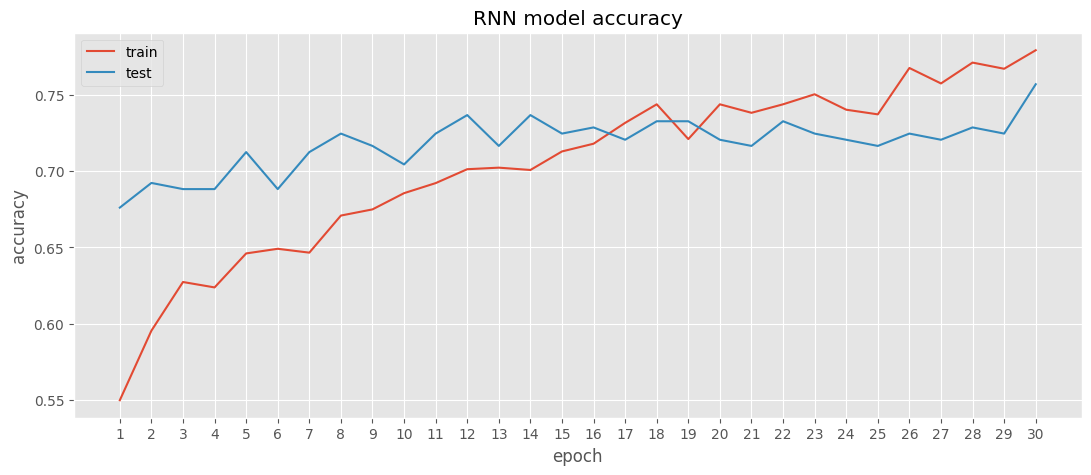

In [ ]:
res_rnn.index = list(range(1, 31))

plt.figure(figsize=(13, 5))
plt.plot(res_rnn['accuracy'])
plt.plot(res_rnn['val_accuracy'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(list(range(1, 31)))
plt.show()


In [ ]:
def rnn_modeling(test_size_list, data, y):
  history_dict = {}
  performances_dict_train = {}
  performances_dict_test = {}

  for test_size in test_size_list:
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=test_size, stratify=y, random_state=45)

    model = keras.Sequential()
    model.add(embedding_layer)
    # model.add(layers.SimpleRNN(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
    # model.add(layers.Dense(1, activation='sigmoid'))

    model.add(layers.Dropout(0.2))
    model.add(layers.SimpleRNN(100)) #Adding 100 RNN neurons in the layer
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1,activation='sigmoid'))

    print(model.summary())

    # Compile networrk
    opt = keras.optimizers.Adam()
    model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

    # fit network
    history = model.fit(X_train, y_train, verbose=1, epochs=30)

    # Model evaluation
    results_train = model.evaluate(X_train,  y_train)
    results_test = model.evaluate(X_test,  y_test)

    history_dict[str(test_size]) = history
    performances_dict_train[str(1-test_size)] = results_train
    performances_dict_test[str(test_size)] = results_test

  return history_dict, performances_dict_train, performances_dict_test

SyntaxError: ignored

In [ ]:
history_dict, performances_dict = rnn_modeling([0.3, 0.2, 0.4], data2, y2)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 742, 100)          680800    
                                                                 
 dropout_20 (Dropout)        (None, 742, 100)          0         
                                                                 
 simple_rnn_10 (SimpleRNN)   (None, 100)               20100     
                                                                 
 dropout_21 (Dropout)        (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 701,001
Trainable params: 20,201
Non-trainable params: 680,800
_________________________________________________________________
None
Epoch 1/30
6/6 [=====================

In [ ]:
performances_dict

{0.3: [1.05214262008667, 0.5866666436195374],
 0.2: [0.9645160436630249, 0.5400000214576721],
 0.4: [1.0575134754180908, 0.6499999761581421]}

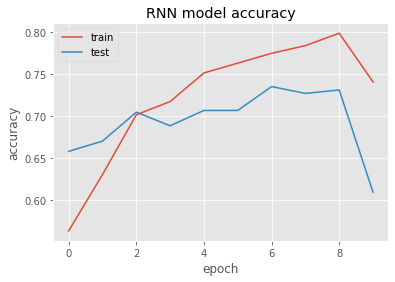

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


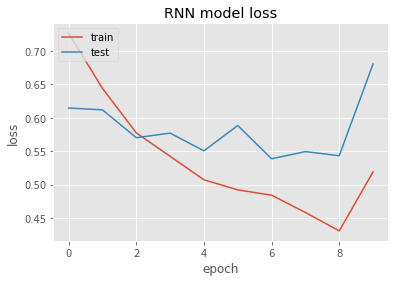

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# RNN Model
model = keras.Sequential()
model.add(embedding_layer)
model.add(layers.SimpleRNN(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1372, 100)         3360700   
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 128)               29312     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 3,390,141
Trainable params: 29,441
Non-trainable params: 3,360,700
_________________________________________________________________
None


In [ ]:
# Compile networrk
opt = keras.optimizers.Adam()
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history = model.fit(data, y, validation_split=0.2, verbose=1, epochs=10)

Epoch 1/10
62/62 [==============================] - 32s 479ms/step - loss: 0.9151 - accuracy: 0.5588 - val_loss: 0.6926 - val_accuracy: 0.5749
Epoch 2/10
62/62 [==============================] - 29s 474ms/step - loss: 0.6568 - accuracy: 0.6395 - val_loss: 0.6698 - val_accuracy: 0.6134
Epoch 3/10
62/62 [==============================] - 29s 469ms/step - loss: 0.6368 - accuracy: 0.6597 - val_loss: 0.6521 - val_accuracy: 0.6255
Epoch 4/10
62/62 [==============================] - 29s 471ms/step - loss: 0.5787 - accuracy: 0.6988 - val_loss: 0.6323 - val_accuracy: 0.6437
Epoch 5/10
62/62 [==============================] - 30s 486ms/step - loss: 0.5604 - accuracy: 0.7115 - val_loss: 0.6127 - val_accuracy: 0.6700
Epoch 6/10
62/62 [==============================] - 29s 472ms/step - loss: 0.5308 - accuracy: 0.7307 - val_loss: 0.6437 - val_accuracy: 0.6599
Epoch 7/10
62/62 [==============================] - 29s 474ms/step - loss: 0.5092 - accuracy: 0.7459 - val_loss: 0.6248 - val_accuracy: 0.6822

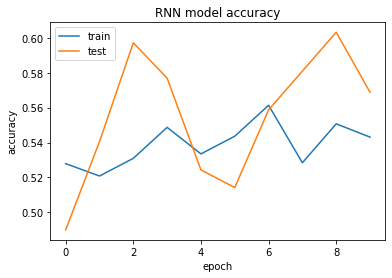

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


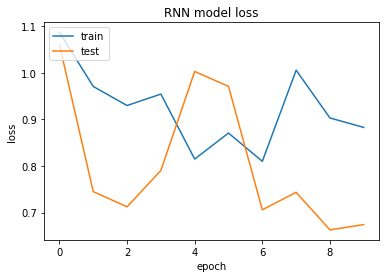

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Bi-RNN

In [ ]:
# # LSTM Model

# model = keras.Sequential()
# model.add(embedding_layer)
# model.add(layers.Bidirectional(layers.RNN(256, activation='relu', dropout=0.2, recurrent_dropout=0.2)))
# model.add(layers.Dense(1, activation='sigmoid'))
# print(model.summary())

# # Compile networrk
# opt = keras.optimizers.Adam()
# model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# # fit network
# history = model.fit(data, y, validation_split=0.2, verbose=1, epochs=10)

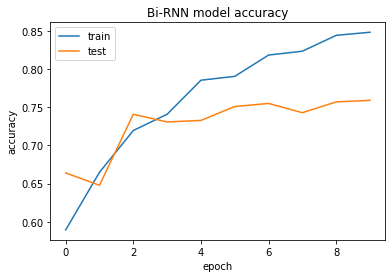

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Bi-RNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


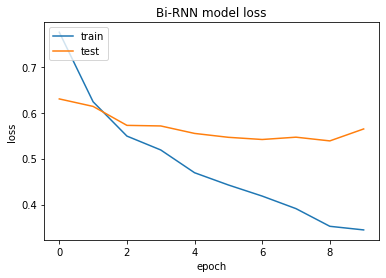

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Bi-RNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### LSTM

In [ ]:
# LSTM Model

model2 = keras.Sequential()
model2.add(embedding_layer)
# model.add(layers.LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dense(1, activation='sigmoid'))

model2.add(layers.Dropout(0.2))
model2.add(layers.LSTM(32)) #Adding 100 lstm neurons in the layer
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(1,activation='sigmoid'))

print(model2.summary())

# Compile networrk
opt = keras.optimizers.Adam()
model2.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history_lstm = model2.fit(X_train, y_train, validation_split=1/9, verbose=1, epochs=30)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2969, 100)         3360700   
                                                                 
 dropout_2 (Dropout)         (None, 2969, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,377,757
Trainable params: 17,057
Non-trainable params: 3,360,700
_________________________________________________________________
None
Epoch 1/30
62/62 [================

In [ ]:
model2.evaluate(X_test, y_test)

8/8 [==============================] - 5s 608ms/step - loss: 0.5205 - accuracy: 0.8138


[0.5205100774765015, 0.8137651681900024]

In [ ]:
pd.DataFrame(history_lstm.history)

,loss,accuracy,val_loss,val_accuracy
0,0.677489,0.566430,0.598852,0.676113
1,0.618627,0.652637,0.556097,0.744939
2,0.573774,0.705882,0.526532,0.744939
3,0.523407,0.743915,0.506665,0.761134
4,0.486939,0.763692,0.501610,0.769231
5,0.446227,0.800710,0.492463,0.785425
6,0.419138,0.818458,0.493781,0.785425
7,0.385437,0.834179,0.518591,0.777328
8,0.366823,0.848377,0.478294,0.785425
9,0.343210,0.870690,0.491064,0.785425


In [ ]:
res_lstm = pd.DataFrame(history_lstm.history)

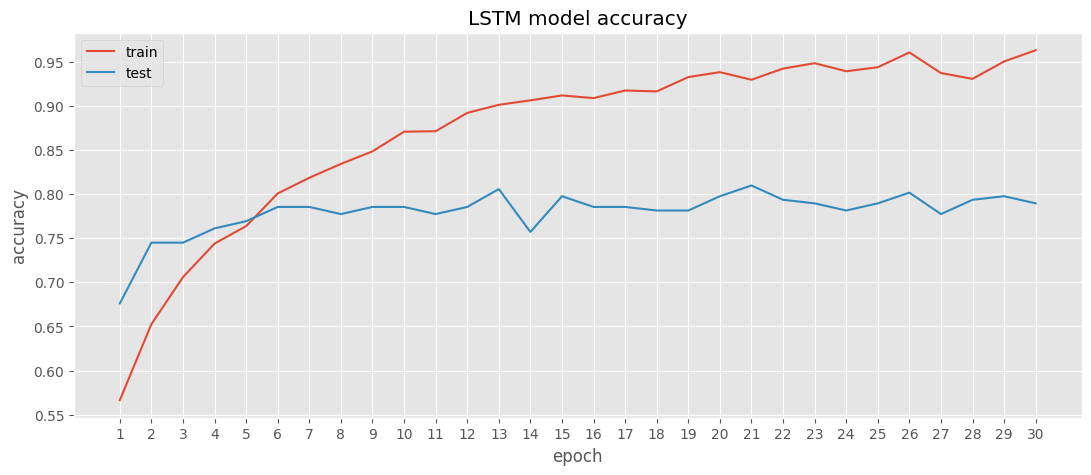

In [ ]:
res_lstm.index = list(range(1, 31))

plt.figure(figsize=(13, 5))
plt.plot(res_lstm['accuracy'])
plt.plot(res_lstm['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(list(range(1, 31)))
plt.show()


In [ ]:
res_lstm.to_csv("akurasi_lstm.csv")

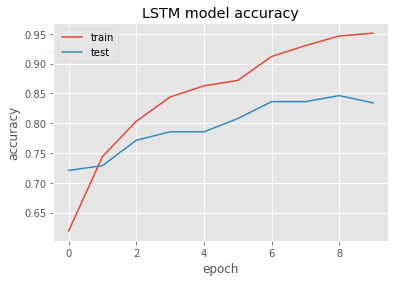

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


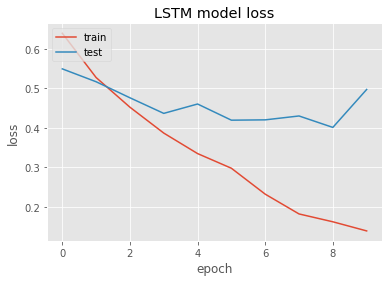

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# LSTM Model

model = keras.Sequential()
model.add(embedding_layer)
# model.add(layers.LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dense(1, activation='sigmoid'))

model.add(layers.Dropout(0.3))
model.add(layers.LSTM(100, activation='relu', recurrent_dropout=0.2)) #Adding 100 lstm neurons in the layer
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))

print(model.summary())

# Compile networrk
opt = keras.optimizers.Adam(learning_rate = 0.005)
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history = model.fit(data, y, validation_split=0.2, verbose=1, epochs=10)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1372, 100)         3360700   
                                                                 
 dropout_14 (Dropout)        (None, 1372, 100)         0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_15 (Dropout)        (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,441,201
Trainable params: 80,501
Non-trainable params: 3,360,700
_________________________________________________________________
None
Epoch 1/10
44/62 [================

KeyboardInterrupt: ignored

In [ ]:
histories = {'accuracy':[0.5112, 0.5101, 0.5101, 0.5101, 0.5101, 0.5101], 'val_accuracy':[0.4980, 0.4980, 0.4980, 0.4980, 0.4980, 0.4980, ]}

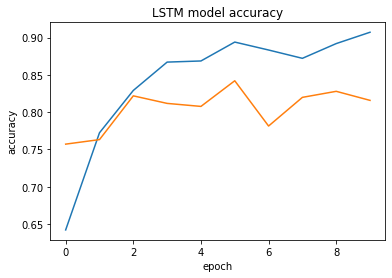

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(histories['accuracy'])
plt.plot(histories['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### GRU

In [ ]:
# GRU Model

model3 = keras.Sequential()
model3.add(embedding_layer)
# model.add(layers.LSTM(128, activation='relu', dropout=0.2, recurrent_dropout=0.2))
# model.add(layers.Dense(1, activation='sigmoid'))

model3.add(layers.Dropout(0.2))
model3.add(layers.GRU(32)) #Adding 100 lstm neurons in the layer
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(1,activation='sigmoid'))

print(model3.summary())

# Compile networrk
opt = keras.optimizers.Adam()
model3.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history_gru = model3.fit(X_train, y_train, validation_split=1/9, verbose=1, epochs=30)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2969, 100)         3360700   
                                                                 
 dropout_4 (Dropout)         (None, 2969, 100)         0         
                                                                 
 gru (GRU)                   (None, 32)                12864     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,373,597
Trainable params: 12,897
Non-trainable params: 3,360,700
_________________________________________________________________
None
Epoch 1/30
62/62 [================

In [ ]:
model3.evaluate(X_test, y_test)

8/8 [==============================] - 3s 392ms/step - loss: 0.5342 - accuracy: 0.7935


[0.5341987013816833, 0.7935222387313843]

In [ ]:
res_gru = pd.DataFrame(history_gru.history)

In [ ]:
res_gru

,loss,accuracy,val_loss,val_accuracy
0,0.710720,0.557302,0.609645,0.643725
1,0.644375,0.641988,0.583574,0.676113
2,0.616258,0.657708,0.565995,0.696356
3,0.581087,0.698276,0.540937,0.696356
4,0.546295,0.721095,0.523418,0.720648
5,0.518606,0.744929,0.514320,0.724696
6,0.498965,0.747972,0.495093,0.753036
7,0.471355,0.775862,0.504603,0.732794
8,0.451989,0.793103,0.482297,0.773279
9,0.416704,0.812373,0.474805,0.781377


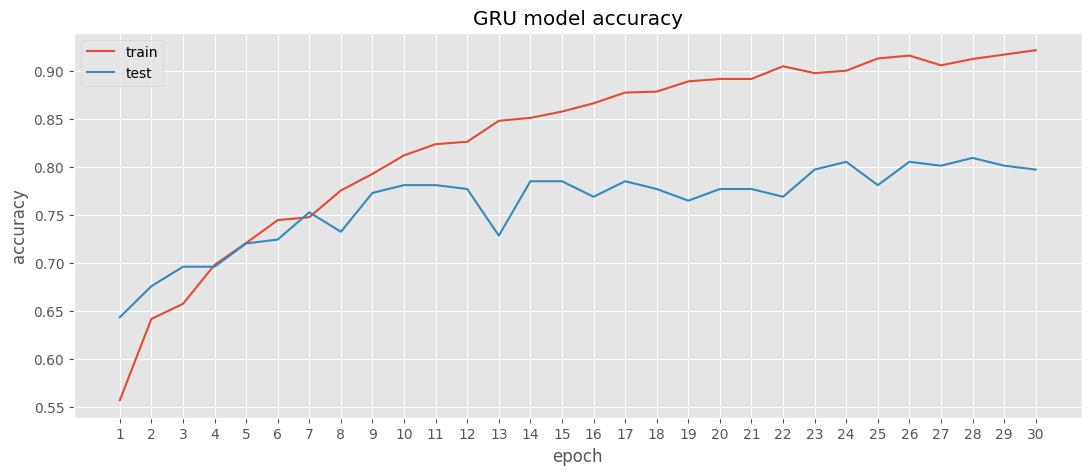

In [ ]:
res_gru.index = list(range(1, 31))

plt.figure(figsize=(13, 5))
plt.plot(res_gru['accuracy'])
plt.plot(res_gru['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(list(range(1, 31)))
plt.show()


In [ ]:
res_gru.to_csv("akurasi_gru.csv")

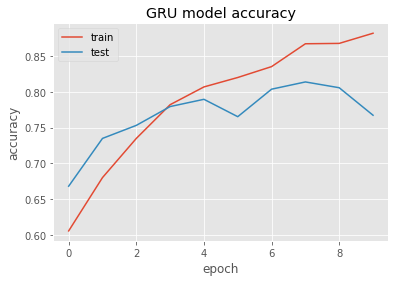

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


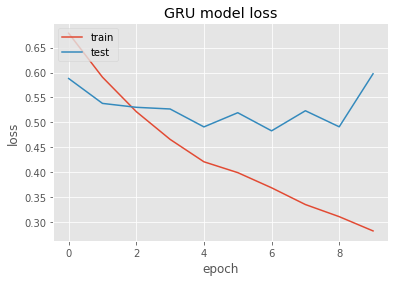

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### CNN

In [ ]:
model = keras.Sequential()
model.add(embedding_layer)

model.add(layers.Conv1D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling1D())
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Compile networrk
opt = keras.optimizers.Adam()
model.compile(loss = 'binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# fit network
history = model.fit(data, y, validation_split=0.2, verbose=1, epochs=10)

Epoch 1/10
62/62 [==============================] - 16s 234ms/step - loss: 0.7110 - accuracy: 0.6121 - val_loss: 0.6372 - val_accuracy: 0.7206
Epoch 2/10
62/62 [==============================] - 14s 229ms/step - loss: 0.4564 - accuracy: 0.7906 - val_loss: 0.5942 - val_accuracy: 0.7024
Epoch 3/10
62/62 [==============================] - 13s 214ms/step - loss: 0.2967 - accuracy: 0.8829 - val_loss: 0.5196 - val_accuracy: 0.7814
Epoch 4/10
62/62 [==============================] - 13s 218ms/step - loss: 0.1866 - accuracy: 0.9376 - val_loss: 0.4936 - val_accuracy: 0.8016
Epoch 5/10
62/62 [==============================] - 13s 205ms/step - loss: 0.1124 - accuracy: 0.9706 - val_loss: 0.4884 - val_accuracy: 0.8239
Epoch 6/10
62/62 [==============================] - 12s 196ms/step - loss: 0.0806 - accuracy: 0.9777 - val_loss: 0.5307 - val_accuracy: 0.8077
Epoch 7/10
62/62 [==============================] - 14s 221ms/step - loss: 0.0596 - accuracy: 0.9878 - val_loss: 0.5424 - val_accuracy: 0.8219

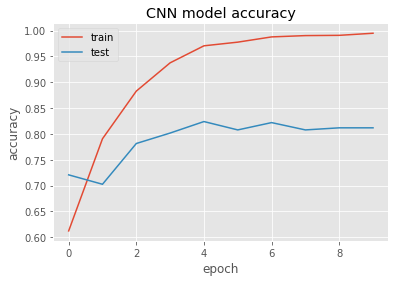

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


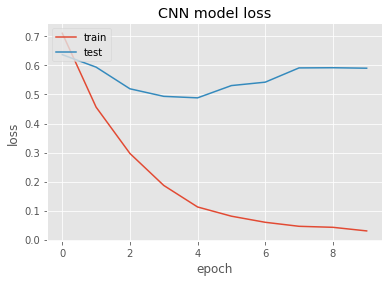

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hasil GCN

In [ ]:
gcn_res = {"Train":[0.4908, 0.6747, 0.6747, 0.6795,
                    0.7637, 0.7804, 0.7850, 0.8012,
                    0.8079, 0.8190, 0.8352, 0.8271,
                    0.8443, 0.8474, 0.8575, 0.8641,
                    0.8595, 0.8757, 0.8818, 0.8803,
                    0.8879, 0.8960, 0.8935, 0.9047,
                    0.9031, 0.9066, 0.9128, 0.9199,
                    0.9254, 0.9188], "Val":[0.4878, 0.6178, 0.6219, 0.6178,
                                      0.6991, 0.7195, 0.7236, 0.7520,
                                    0.7520, 0.7683, 0.7724, 0.7602,
                                    0.7683, 0.7805, 0.7726, 0.7683,
                                    0.8008, 0.7927, 0.8170, 0.8130,
                                    0.8293, 0.8333, 0.8250, 0.8415,
                                    0.8496, 0.8333, 0.8374, 0.8374,
                                    0.8536, 0.8455]}

In [ ]:
res_gcn = pd.DataFrame(gcn_res)

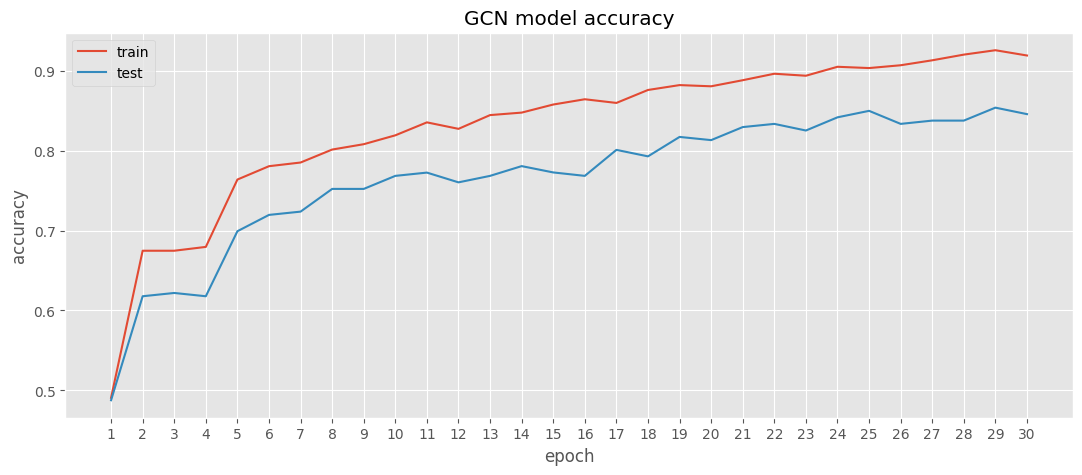

In [ ]:
res_gcn.index = list(range(1, 31))

plt.figure(figsize=(13, 5))
plt.plot(res_gcn['Train'])
plt.plot(res_gcn['Val'])
plt.title('GCN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xticks(list(range(1, 31)))
plt.show()


### Visualisasi

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gru_perf = pd.read_csv("akurasi_gru.csv")
lstm_perf = pd.read_csv("akurasi_lstm.csv")
rnn_perf = pd.read_csv("akurasi_rnn.csv")
gcn_perf = pd.read_csv("akurasi_gcn.csv")[:30]

In [ ]:
gcn_perf['Unnamed: 0'] = gcn_perf['Unnamed: 0'] + 1

In [ ]:
rnn_perf.info(), lstm_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   loss          30 non-null     float64
 2   accuracy      30 non-null     float64
 3   val_loss      30 non-null     float64
 4   val_accuracy  30 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   loss          30 non-null     float64
 2   accuracy      30 non-null     float64
 3   val_loss      30 non-null     float64
 4   val_accuracy  30 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


(None, None)

In [ ]:
gcn_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    30 non-null     int64  
 1   accuracy      30 non-null     float64
 2   val_accuracy  30 non-null     float64
 3   loss          30 non-null     float64
 4   val_loss      30 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.3 KB


In [ ]:
rnn_perf['Model'] = 'RNN'
lstm_perf['Model'] = 'LSTM'
gru_perf['Model'] = 'GRU'
gcn_perf['Model'] = 'GCN'

df_perf = pd.concat([rnn_perf, lstm_perf, gru_perf, gcn_perf])
df_perf = df_perf.rename(columns={'Unnamed: 0':'Epochs'})

In [ ]:
df_perf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 29
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Epochs        120 non-null    int64  
 1   loss          120 non-null    float64
 2   accuracy      120 non-null    float64
 3   val_loss      120 non-null    float64
 4   val_accuracy  120 non-null    float64
 5   Model         120 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.6+ KB


In [ ]:
plt.style.use("ggplot")

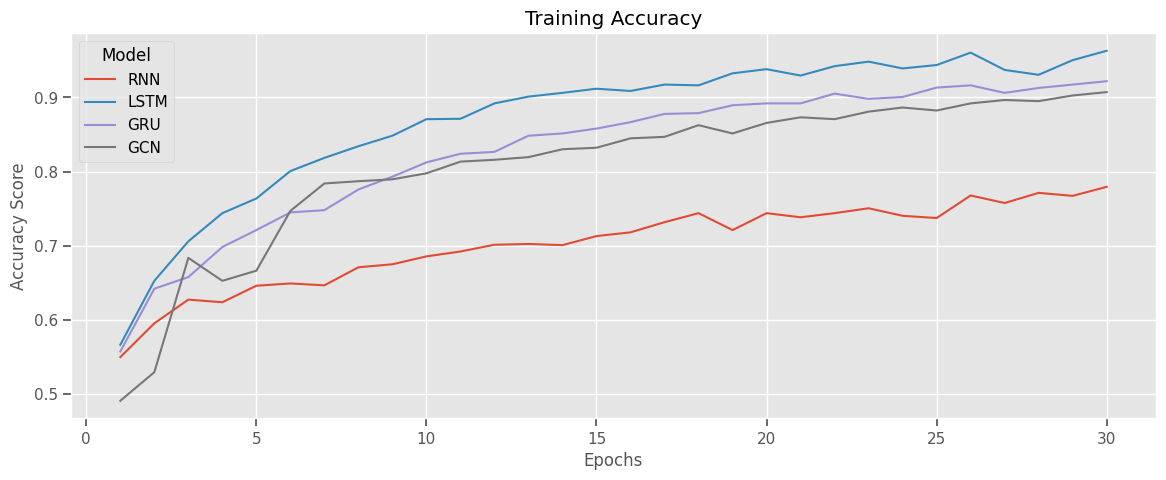

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_perf, x='Epochs', y='accuracy', hue='Model')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.show()


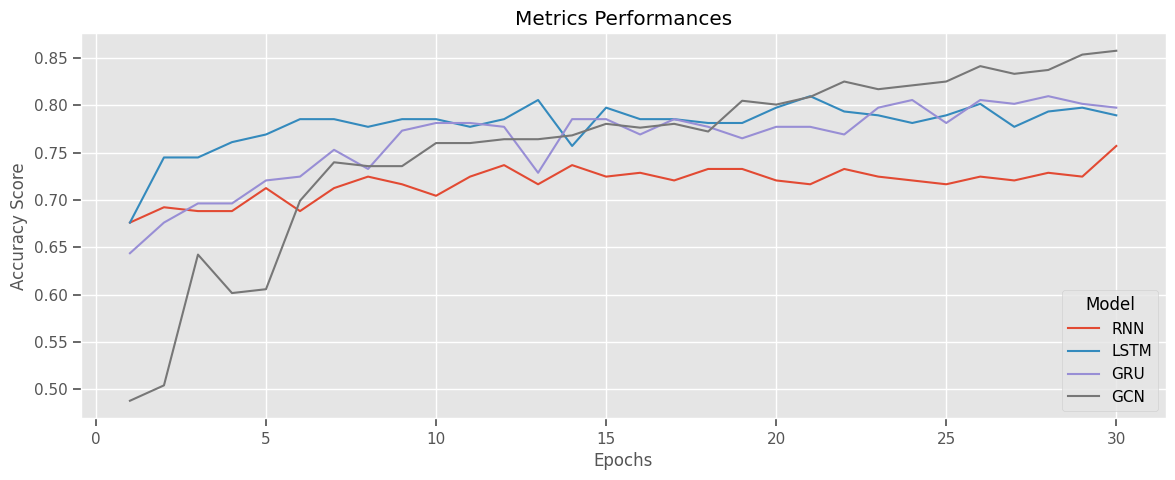

In [ ]:
plt.figure(figsize=(14,5))
sns.lineplot(data=df_perf, x='Epochs', y='val_accuracy', hue='Model')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.title("Metrics Performances")
plt.show()

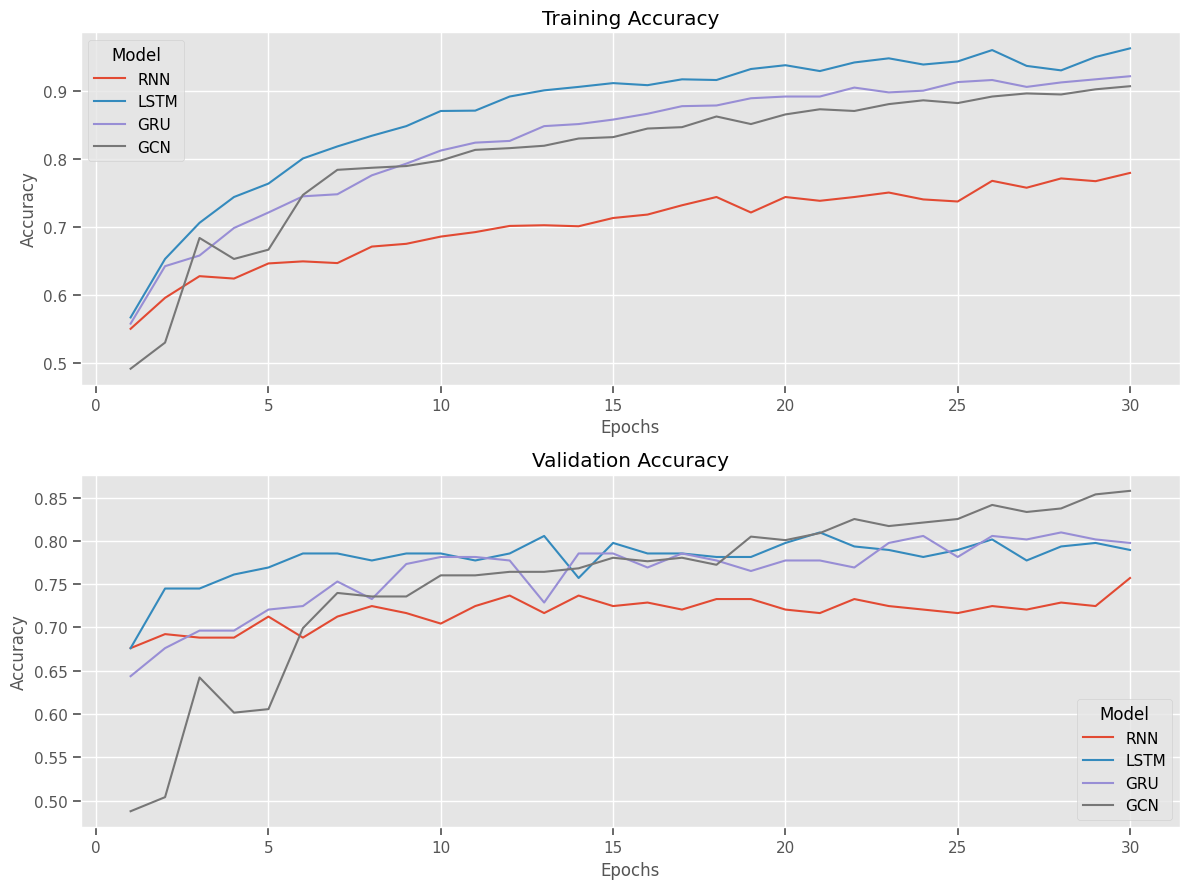

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and axes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

# Plot on the first subplot
sns.lineplot(data=df_perf, x='Epochs', y='accuracy', hue='Model', ax=axes[0])
axes[0].set_ylabel("Accuracy")

# Plot on the second subplot
sns.lineplot(data=df_perf, x='Epochs', y='val_accuracy', hue='Model', ax=axes[1])
axes[1].set_ylabel("Accuracy")

# Add titles to the subplots
axes[0].set_title('Training Accuracy')
axes[1].set_title('Validation Accuracy')

# Adjust the layout to avoid overlapping
plt.tight_layout()



# Display the plot
plt.savefig("metric_performances.png")
plt.show()

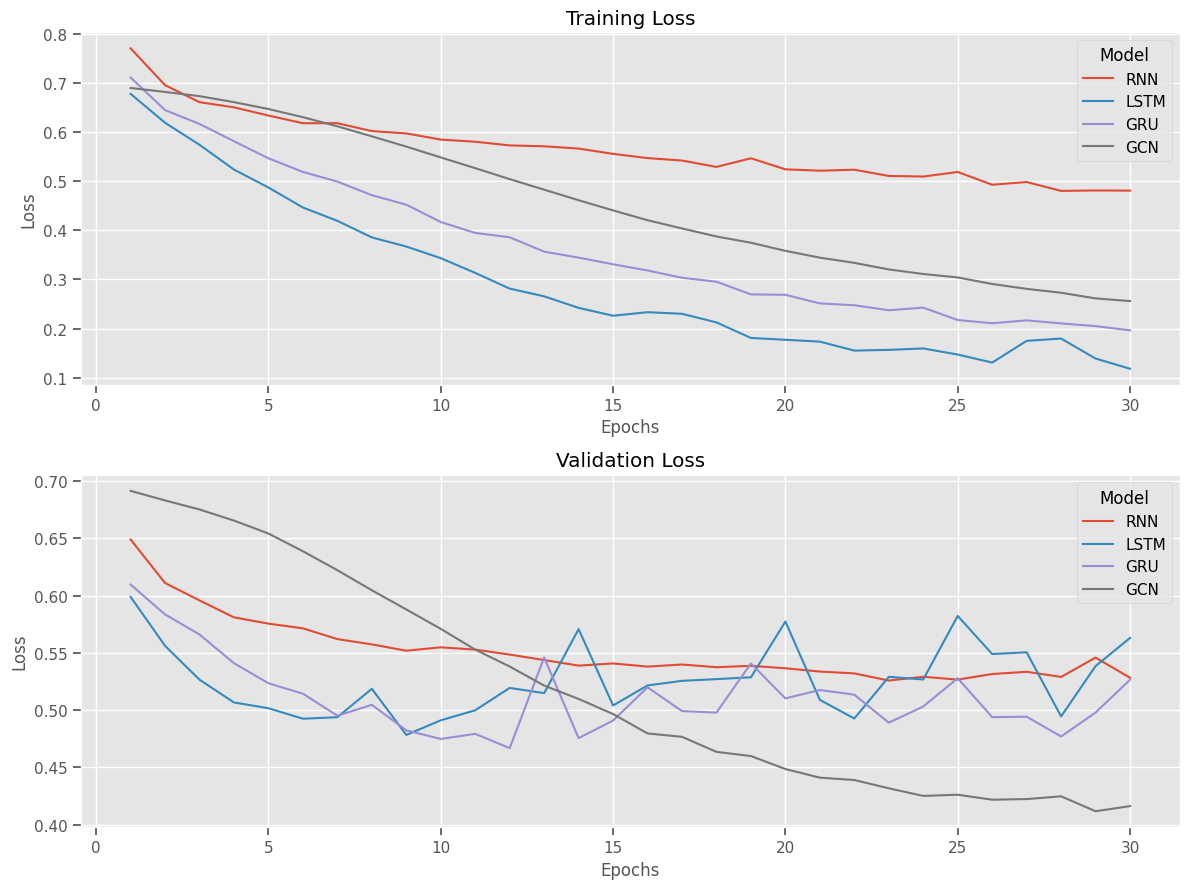

In [ ]:
import matplotlib.pyplot as plt

# Create the figure and axes

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))

# Plot on the first subplot
sns.lineplot(data=df_perf, x='Epochs', y='loss', hue='Model', ax=axes[0])
axes[0].set_ylabel("Loss")

# Plot on the second subplot
sns.lineplot(data=df_perf, x='Epochs', y='val_loss', hue='Model', ax=axes[1])
axes[1].set_ylabel("Loss")

# Add titles to the subplots
axes[0].set_title('Training Loss')
axes[1].set_title('Validation Loss')

# Adjust the layout to avoid overlapping
plt.tight_layout()



# Display the plot
plt.savefig("loss_performances.png")
plt.show()

### Coret - Coretan

In [ ]:
cleaned_data.loc[cleaned_data['len_words'] == cleaned_data['len_words'].min(), ['berita', 'kategori']]

In [ ]:
cleaned_data.loc[cleaned_data['len_words'] == cleaned_data['len_words'].median(), ['berita', 'kategori']]

In [ ]:
cleaned_data.loc[cleaned_data['len_words'] == cleaned_data['len_words'].max(), ['berita', 'kategori']]

In [ ]:
data.iloc[997, 0]

In [ ]:
# def find_words(texts, label, builder = CountVectorizer(min_df=3, max_df=0.9,
#                                                        ngram_range=(1,2))):
#     """
#     Memeriksa kalimat berdasarkan kelasnya untuk membuat vocab
#     """
#     builder.fit(texts)
#     n_class, res = len(set(label)), {}
#     for i in tqdm(range(len(texts))):
#         for vocab in texts[i].split():
#             if vocab in builder.vocabulary_:
#                 if vocab not in res:
#                     res[vocab] = [0] * n_class + [0]
#                 res[vocab][label[i]] += 1
#                 res[vocab][-1] += 1
#     df = pd.DataFrame({'kata' : list(res.keys())})
#     for i in range(n_class):
#         df[f'Kelas_{i}'] = [res[x][i] for x in res]
#     df['Frekuensi'] = [res[x][-1] for x in res]
#     return df.sort_values(by = ['Frekuensi'], ascending = False).reset_index(drop=True)

In [ ]:
# words = find_words(cleaned_data['berita'], cleaned_data['kategori'].values)
# words['Max_prop'] = words[['Kelas_0', 'Kelas_1']].max(axis = 1) / words['Frekuensi']
# words.head(10)